In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
m = pd.read_csv('2019_atbats.csv') #downloaded from Kaggle. Shows the outcome of every at-bat in the MLB 2019 season, with
#information, such as the inning, out cont, players involved in the AB, etc.
m

,inning,top,ab_id,g_id,p_score,batter_id,pitcher_id,stand,p_throws,event,o
0,1.0,1.0,2.019000e+09,201900001.0,0.0,594777,571666,L,R,Flyout,1
1,1.0,1.0,2.019000e+09,201900001.0,0.0,545361,571666,R,R,Flyout,2
2,1.0,1.0,2.019000e+09,201900001.0,0.0,571506,571666,L,R,Groundout,3
3,1.0,0.0,2.019000e+09,201900001.0,0.0,543257,502239,L,R,Single,0
4,1.0,0.0,2.019000e+09,201900001.0,0.0,656305,502239,R,R,Flyout,1
...,...,...,...,...,...,...,...,...,...,...,...
185240,8.0,0.0,2.019185e+09,201902408.0,1.0,643376,656222,R,L,Strikeout,2
185241,8.0,0.0,2.019185e+09,201902408.0,1.0,620446,656222,R,L,Forceout,3
185242,9.0,1.0,2.019185e+09,201902408.0,4.0,663993,571704,L,R,Groundout,1
185243,9.0,1.0,2.019185e+09,201902408.0,4.0,622110,571704,R,R,Groundout,2


In [3]:
n = m.drop('p_score', axis ='columns') #dropped p_score column from "m" and saved result as "n", in case 
#I need to call back "m" later on in this project.
n = n.drop(['ab_id', 'g_id', 'batter_id', 'pitcher_id', 'top' , 'p_throws' , 'stand' , 'o' ], axis='columns') #dropped some other columns too.
n = n.head(100) #stored df "n" as first 100 entries of "n" only, instead of >185000 entries.
n

,inning,event
0,1.0,Flyout
1,1.0,Flyout
2,1.0,Groundout
3,1.0,Single
4,1.0,Flyout
...,...,...
95,4.0,Groundout
96,4.0,Strikeout
97,4.0,Home Run
98,4.0,Lineout


In [4]:
#renamed all possible outcomes resulting in outs to 'out':
n.loc[n["event"] == 'Forceout', 'event'] ='Out'
n.loc[n["event"] == 'Flyout', 'event'] ='Out'
n.loc[n["event"] == 'Fielders Choice Out', 'event'] ='Out'
n.loc[n["event"] == 'Pop Out', 'event'] ='Out'
n.loc[n["event"] == 'Sac Bunt', 'event'] ='Out'
n.loc[n["event"] == 'Sac Fly', 'event'] ='Out'
n.loc[n["event"] == 'Grounded Into DP', 'event'] ='Out'
n.loc[n["event"] == 'Lineout', 'event'] ='Out'
n.loc[n["event"] == 'Groundout', 'event'] ='Out'
n.loc[n["event"] == 'Strikeout', 'event'] ='Out'
n

,inning,event
0,1.0,Out
1,1.0,Out
2,1.0,Out
3,1.0,Single
4,1.0,Out
...,...,...
95,4.0,Out
96,4.0,Out
97,4.0,Home Run
98,4.0,Out


In [5]:
n = n.drop(n[n.event =="Out"].index) #drops all instnaces from "n" where the "event" is an "Out."

O=n.sort_values(['inning','event'], ascending =[1,1]) #This result needs to be displayed as a new variable because the sort_values
#function creates a new dataframe. If I was to display 'n' it would show the old, unsorted table intead of the new one.
print(O) #O is the table n, with results sorted by inning and event. 

    inning         event
69     1.0        Double
3      1.0        Single
66     1.0        Single
70     1.0          Walk
73     1.0          Walk
8      2.0  Hit By Pitch
81     2.0      Home Run
79     2.0        Single
11     2.0        Triple
21     3.0        Double
19     3.0        Single
20     3.0          Walk
29     4.0      Home Run
93     4.0      Home Run
94     4.0      Home Run
97     4.0      Home Run
92     4.0        Single
24     4.0          Walk
33     5.0        Double
34     5.0          Walk
42     6.0      Home Run
39     6.0          Walk
46     7.0          Walk
55     8.0        Single
56     8.0        Single
58     8.0        Single


In [6]:
#creating column and list_column # to help with creating plots and arrays later:
O.insert(loc=2, column='list_column', value=0) #creates new column 'list_column' and assigns all instances a value of 0.
O.loc[O['event'] == 'Hit By Pitch', 'list_column'] = 1 #assigns different events with different matrix #s 1-6.
O.loc[O['event'] == 'Home Run', 'list_column'] = 2
O.loc[O['event'] == 'Sac Bunt', 'list_column'] = 3
O.loc[O['event'] == 'Single', 'list_column'] = 4
O.loc[O['event'] == 'Triple', 'list_column'] = 5
O.loc[O['event'] == 'Walk', 'list_column'] = 6
O


#creating miniature tables for each inning:
K1=O.loc[O['inning'] == 1.0] #K1 will be "O", but only contains the first innning results.
print(K1)
count_K1 = K1['event'].value_counts()
print(count_K1)

K2=O.loc[O['inning'] == 2.0]
print(K2)
count_K2 = K2['event'].value_counts()
print(count_K2)

K3=O.loc[O['inning'] == 3.0]
print(K3)
count_K3 = K3['event'].value_counts()
print(count_K3)

K4=O.loc[O['inning'] == 4.0]
print(K4)
count_K4 = K4['event'].value_counts()
print(count_K4)

K5=O.loc[O['inning'] == 5.0]
print(K5)
count_K5 = K5['event'].value_counts()
print(count_K5)

K6=O.loc[O['inning'] == 6.0]
print(K6)
count_K6 = K6['event'].value_counts()
print(count_K6)

K7=O.loc[O['inning'] == 7.0]
print(K7)
count_K7 = K7['event'].value_counts()
print(count_K7)

K8=O.loc[O['inning'] == 8.0]
print(K8)
count_K8 = K8['event'].value_counts()
print(count_K8)

K9=O.loc[O['inning'] == 9.0]
print(K9)
count_K9 = K9['event'].value_counts()
print(count_K9)

    inning   event  list_column
69     1.0  Double            0
3      1.0  Single            4
66     1.0  Single            4
70     1.0    Walk            6
73     1.0    Walk            6
Single    2
Walk      2
Double    1
Name: event, dtype: int64
    inning         event  list_column
8      2.0  Hit By Pitch            1
81     2.0      Home Run            2
79     2.0        Single            4
11     2.0        Triple            5
Hit By Pitch    1
Home Run        1
Single          1
Triple          1
Name: event, dtype: int64
    inning   event  list_column
21     3.0  Double            0
19     3.0  Single            4
20     3.0    Walk            6
Double    1
Single    1
Walk      1
Name: event, dtype: int64
    inning     event  list_column
29     4.0  Home Run            2
93     4.0  Home Run            2
94     4.0  Home Run            2
97     4.0  Home Run            2
92     4.0    Single            4
24     4.0      Walk            6
Home Run    4
Single      1
Wa

Text(0.5, 1.0, '# of Occurences vs. Events per Inning')

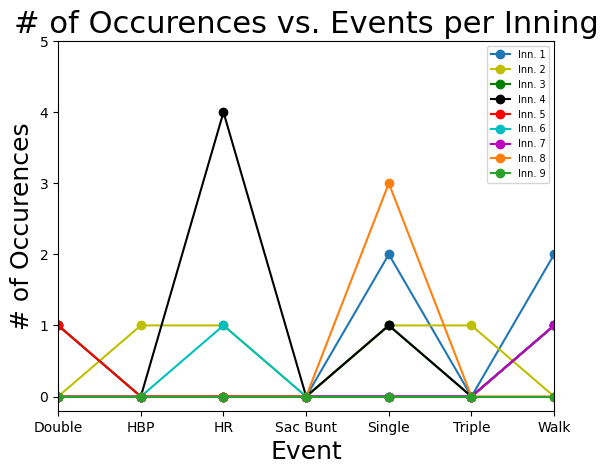

In [7]:
#creating arrays to plot.
INN1=[1,0,0,0,2,0,2]
INN2=[0,1,1,0,1,1,0]
INN3=[1,0,0,0,1,0,1]
INN4=[0,0,4,0,1,0,1]
INN5=[1,0,0,0,0,0,1]
INN6=[0,0,1,0,0,0,1]
INN7=[0,0,0,0,0,0,1]
INN8=[0,0,0,0,3,0,0]
INN9=[0,0,0,0,0,0,0]
L =['Double', 'HBP', 'HR', 'Sac Bunt', 'Single', 'Triple', 'Walk'] #truncated some event names here.

#plotting the 9 lines:
mp.plot(L,INN1, 'o-') #mp.plot function cretaes line graph, with (x,y) being L and INN1. This line graph of(L,INN1) is NOT a dataframe.
mp.plot(L,INN2, 'yo-')
mp.plot(L,INN3, 'go-')
mp.plot(L,INN4, 'ko-')
mp.plot(L,INN5, 'ro-')
mp.plot(L,INN6, 'co-')
mp.plot(L,INN7, 'mo-')
mp.plot(L,INN8, 'o-')
mp.plot(L,INN9, 'o-')

#editing the plot labels, limits, legend, title, etc.:
mp.xlabel('Event', fontsize = 18)
mp.ylabel('# of Occurences', fontsize = 18)
mp.xlim(0, 6) #changed x-axis scale.
mp.ylim(-0.2, 5)
mp.yticks(range(6))
mp.legend( ['Inn. 1', 'Inn. 2', 'Inn. 3', 'Inn. 4', 'Inn. 5', 'Inn. 6', 'Inn. 7', 'Inn. 8', 'Inn. 9'], fontsize = 7)
mp.title("# of Occurences vs. Events per Inning", fontsize = 22)

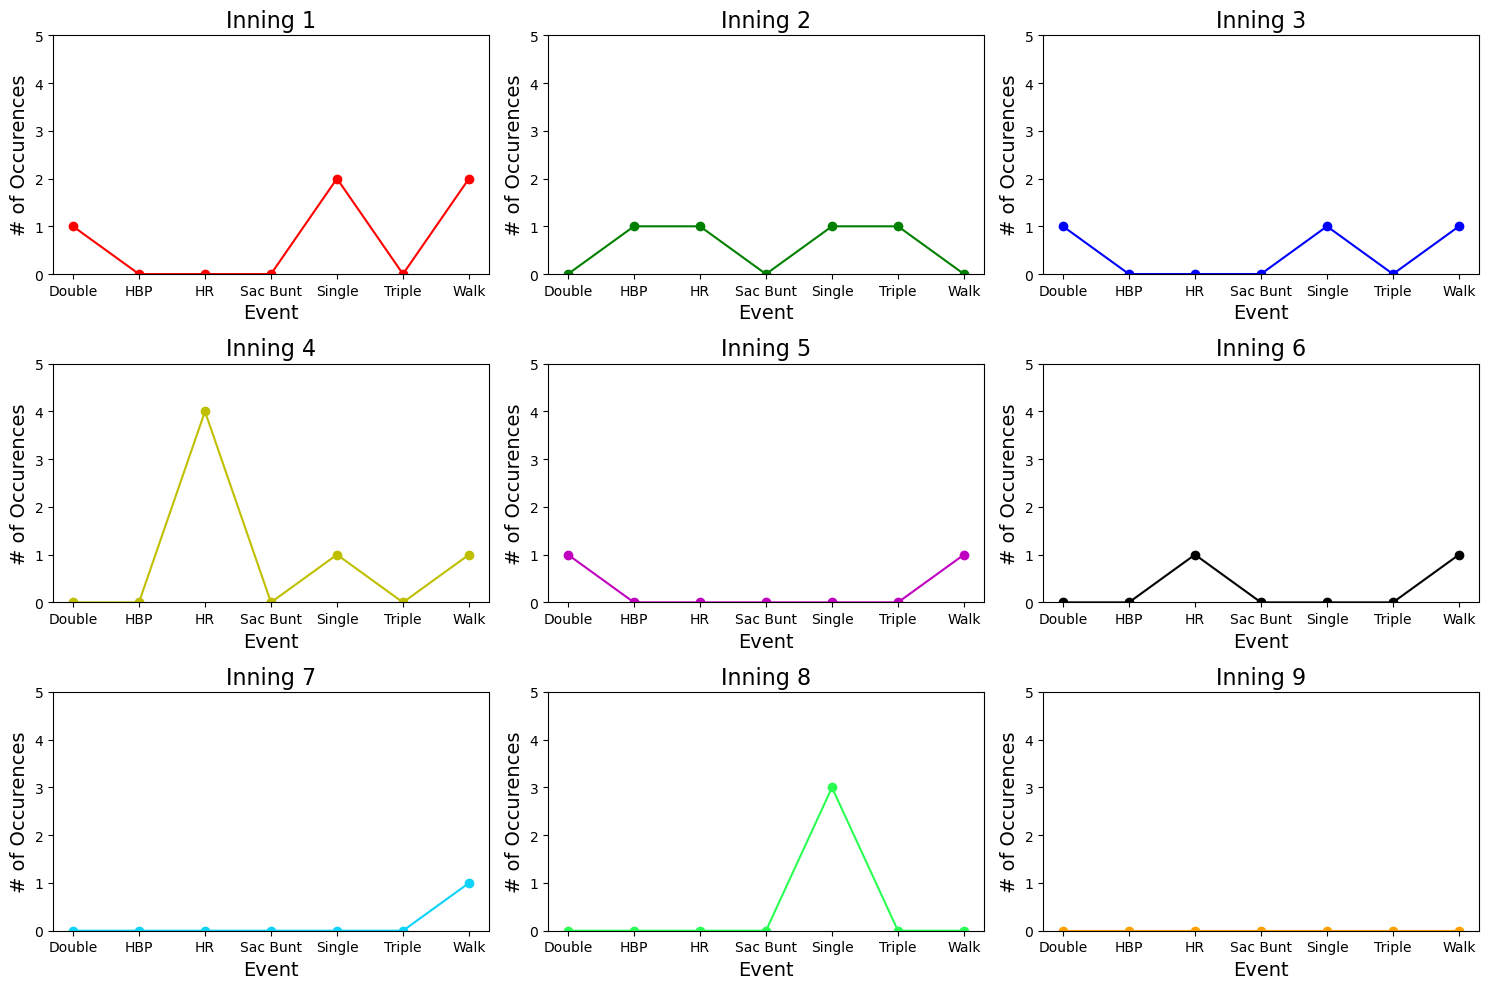

In [9]:
#creating subplots:
fig, AX = mp.subplots(nrows=3, ncols=3, figsize =(15,10)) #this creates 9 subplots, in a 3x3 fashion
#there will be 3 subplots in row 0, 3 in row 1 and 3 in row 2.
#fig, is the amount of figures you want to dsiplay, in this case I went with the default which is 1 fig (you can see 
#below that for the 9 subplots, not once did I specify the fig, because all subplots are on fig. 1) 
#(also you can name these whatever you want, it doesn't have to be called fig or figure)
#AX specifies the axes (you can call these whatever you want also, I just like AX)
#figsize(can be called anything???????) controls how large you want the figures (and by extension the subplots) to be.

#Row 1:
AX[0,0].plot(L, INN1, 'ro-') #The [0,0] specifies where this subplot will go in the 3x3 grid (which was established above
#with the nrows=3, and ncols=3) 'ro-' is shorthand notation for a red solid line with 'o' markers.
#r=red, g=green, b=blue, c=cyan, m=magenta, y=yellow, k=black.
#- = solid line, -- = dashed line, o = marker/points, -. = dash-dot line, .- = solid line w/points, : = dot line 
AX[0,1].plot(L, INN2, 'go-')
AX[0,2].plot(L, INN3, 'bo-')
    
#Row 2:
AX[1,0].plot(L, INN4, 'yo-') #these 3 plots will be in the second row (row index is 1 here, instead of 0 like the plots above)
AX[1,1].plot(L, INN5, 'mo-')
AX[1,2].plot(L, INN6, 'ko-')
        
#Row 3:
AX[2,0].plot(L, INN7, '#0dd3f8', linestyle='-', marker ='o') 
#color hex values can also be used, but not in conjunction with line style shorthand notation.
AX[2,1].plot(L, INN8, '#29FF53', linestyle='-', marker = 'o')
AX[2,2].plot(L, INN9, '#ffa100', linestyle='-', marker = 'o')


#labels for subplots:
for i in range(3): #for i in range 3 and j in range 3 specifies a 3x3 matrix with rows i and columns j
    for j in range(3):
        AX[i, j].set_xlabel('Event', fontsize=14)
        AX[i, j].set_ylabel('# of Occurences', fontsize=14)
        AX[i, j].set_ylim(0,5)
        AX[i, j].set_yticks(range(6)) #Had to use range function to set y-ticks because typing (0,5)
        #results in error, due to subplot having matrix properties??? Remember, stop index is exclusive,
        #so (range(5)) and (0,5) will display the numbers 0, 1, 2, 3, and 4, but not 5.
        AX[i, j].set_title(f'Inning {i*3 + j + 1}', fontsize=16) #i*3 (can be 0*3, 1*3 or 2*3, so 0, 3 or 6),
        #added to "j+1" (0+1, 1+1, or 2+1, so 1, 2 or 3) will give #the correct inning number for every subplot title.
            
#more formatting:        
mp.tight_layout() #ensures subplot text does not overlap with each other.